In [1]:

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from collections import deque

In [2]:
def show_image(title, image):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:

output_dir = "results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


Create synthetic image

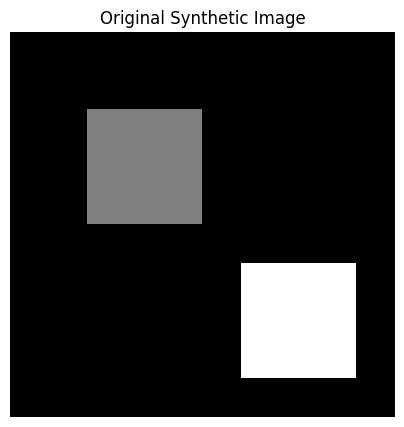

True

In [4]:

def create_synthetic_image():
    img = np.zeros((100, 100), dtype=np.uint8)
    img[20:50, 20:50] = 100   # Object 1
    img[60:90, 60:90] = 200   # Object 2
    return img

img = create_synthetic_image()
show_image("Original Synthetic Image", img)
cv2.imwrite(f"{output_dir}/synthetic_image.png", img)


Add Gaussian noise

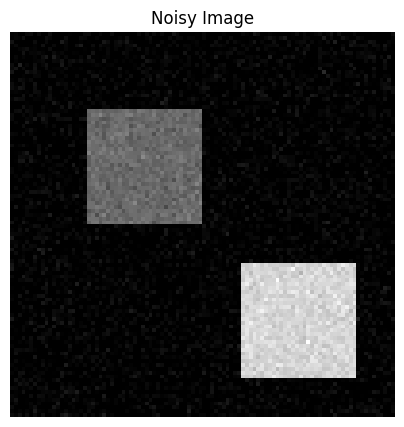

True

In [5]:

def add_gaussian_noise(image, mean=0, sigma=10):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

noisy_img = add_gaussian_noise(img)
show_image("Noisy Image", noisy_img)
cv2.imwrite(f"{output_dir}/noisy_image.png", noisy_img)


Otsu's Thresholding

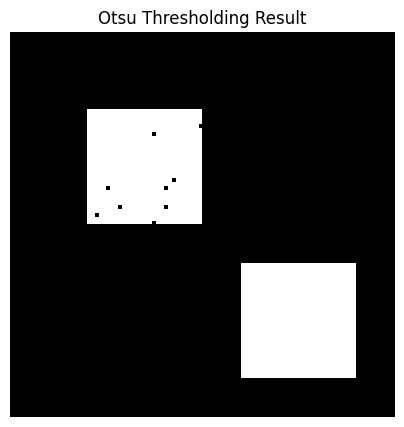

True

In [6]:

def otsu_threshold(image):
    _, thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_img

otsu_img = otsu_threshold(noisy_img)
show_image("Otsu Thresholding Result", otsu_img)
cv2.imwrite(f"{output_dir}/otsu_result.png", otsu_img)


Region Growing

In [7]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from collections import deque

In [8]:

import os
import cv2


img_path = os.path.join( "apple.jpg")


img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")


height, width = img.shape
print(f"Image dimensions: Width = {width} px, Height = {height} px")


Image dimensions: Width = 6684 px, Height = 5347 px


In [9]:
def region_growing(image, seed, threshold=20):
    h, w = image.shape
    visited = np.zeros_like(image, dtype=np.uint8)
    region = np.zeros_like(image, dtype=np.uint8)

    seed_val = int(image[seed])
    queue = deque([seed])
    visited[seed] = 1
    region[seed] = 255

    while queue:
        y, x = queue.popleft()
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                ny, nx = y + dy, x + dx
                if 0 <= ny < h and 0 <= nx < w and not visited[ny, nx]:
                    pixel_val = int(image[ny, nx])
                    if abs(pixel_val - seed_val) <= threshold:
                        queue.append((ny, nx))
                        visited[ny, nx] = 1
                        region[ny, nx] = 255

    return region


In [10]:

seed_point = (3490, 2187)  # (x, y)


segmented = region_growing(img, seed=seed_point, threshold=25)



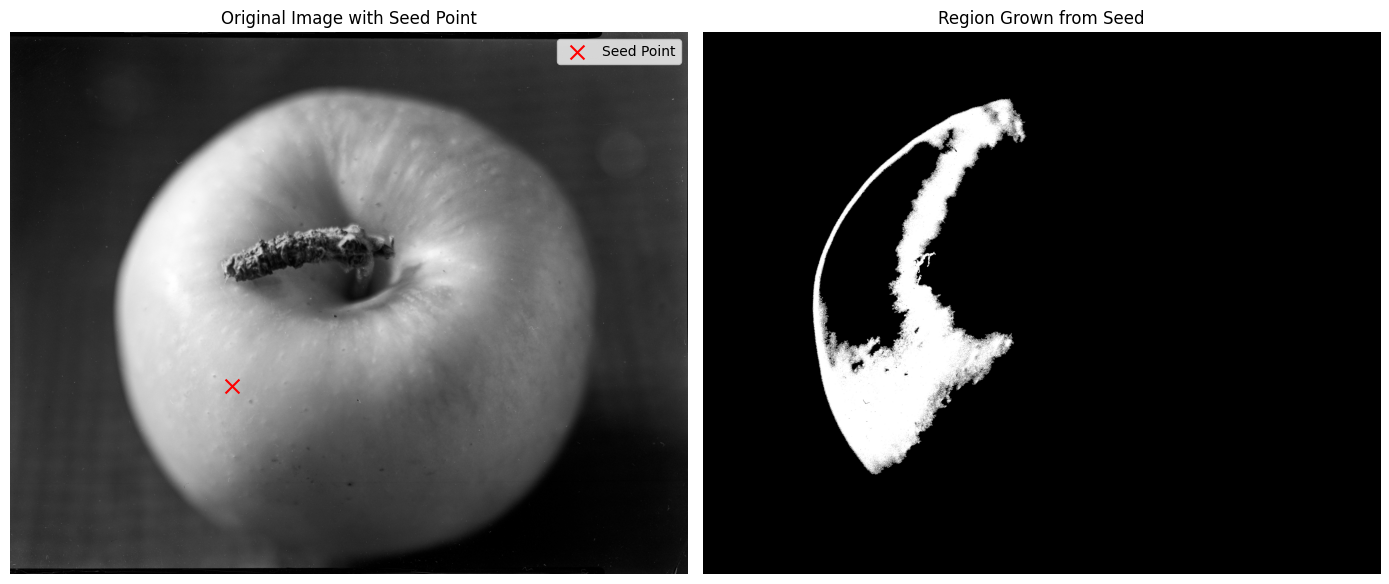

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.scatter(seed_point[1], seed_point[0], color='red', marker='x', s=100, label='Seed Point')
plt.title("Original Image with Seed Point")
plt.axis('off')
plt.legend()


plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Region Grown from Seed")
plt.axis('off')

plt.tight_layout()
plt.show()


In [12]:
import os

output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(f"{output_dir}/region_growing.png", segmented)


True